#  Importing libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

# Reading our training data.

In [2]:
dataset_train = pd.read_csv("C:/Users/mdash/OneDrive/Desktop/Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

# Getting our training data in shape.

In [3]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Creating the Stock Price Prediction model.

In [4]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

print(regressor.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

# Training the Stock Price Prediction model.

In [5]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 159ms/step - loss: 0.0395
Epoch 2/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 7s 177ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0046
Epoch 13/100

# Reading the test data.

In [9]:
dataset_test = pd.read_csv("C:/Users/mdash/OneDrive/Desktop/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the Stock Price Predictions on test data

In [10]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


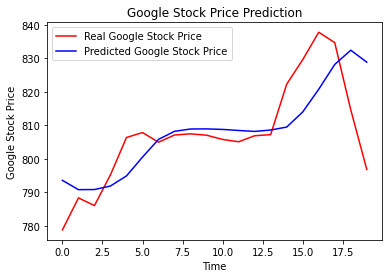

In [11]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()